### Getting Data from PostgreSQL DB

Prior to this we have successfull obtained our dataset from Kaggle and migrated it from a `sqlite` database to a `PostgreSQL` database. Now we can query from it using the `psycopg2` package.

#### Required Packages

In [71]:
import pandas as pd       # Data manipulation
import psycopg2           # Query against psql dbs
import numpy as np        # math and arrays
import matplotlib.pyplot as plt # plotting
import seaborn as sns

#### Create Connection

We stored out data in a `PostgreSQL` database named `soccer`.

In [10]:
conn = psycopg2.connect("dbname=soccer")

---

---

### Set up queries

We will write queries for each of our proposed hypothesis tests.

#### 4) Impact of team dribbling on win percentage. 

In [20]:
query_4 = """
    /* Home Teams */
    select 
        country_name, league_name, team_short_name 
        ,team_long_name, season, stage, match_date
        ,home_team_goal
        ,away_team_goal
        ,team_dribble_rating
        ,team_dribble_scale
        ,'H' as home_or_away
    from
    (
    select
        c.name as country_name
        ,l.name as league_name
        ,ht.team_short_name 
        ,ht.team_long_name 
        ,m.season, m.stage, m.date as match_date, m.match_api_id
        ,m.home_team_goal
        ,m.away_team_goal
        ,hta.buildupplaydribbling as team_dribble_rating
        ,hta.buildupplaydribblingclass as team_dribble_scale
        ,row_number() over (partition by m.home_team_api_id, m.date
            order by to_date(hta.date, 'yyyy-mm-dd')) as enumer
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team ht on m.home_team_api_id = ht.team_api_id
        inner join team_attributes hta on hta.team_api_id = m.home_team_api_id
            and to_date(m.date, 'yyyy-mm-dd') 
                <= to_date(hta.date, 'yyyy-mm-dd') 
    ) ranked
    where 
        enumer = 1
        
    union all
    
    /* Away teams */
    select 
        country_name, league_name, team_short_name 
        ,team_long_name, season, stage, match_date
        ,home_team_goal
        ,away_team_goal
        ,team_dribble_rating
        ,team_dribble_scale
        ,'A' as home_or_away
    from
    (
    select
        c.name as country_name
        ,l.name as league_name
        ,at.team_short_name 
        ,at.team_long_name 
        ,m.season, m.stage, m.date as match_date, m.match_api_id
        ,m.home_team_goal
        ,m.away_team_goal
        ,ata.buildupplaydribbling as team_dribble_rating
        ,ata.buildupplaydribblingclass as team_dribble_scale
        ,row_number() over (partition by m.home_team_api_id, m.date
            order by to_date(ata.date, 'yyyy-mm-dd')) as enumer
    from
        match m
        inner join country c on m.country_id = c.id
        inner join league l on m.league_id = l.id
        inner join team at on m.away_team_api_id = at.team_api_id
        inner join team_attributes ata on ata.team_api_id = m.home_team_api_id
            and to_date(m.date, 'yyyy-mm-dd') 
                <= to_date(ata.date, 'yyyy-mm-dd') 
    ) ranked
    where 
        enumer = 1
;
"""

---

### Run queries, put contents into pandas DataFrame

In [21]:
cur = conn.cursor()
cur.execute(query_4)

In [22]:
soccer = pd.DataFrame(cur.fetchall())
soccer.columns = [desc[0] for desc in cur.description]

In [23]:
soccer.head(100).T

0                    1   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  2                    3   
match_date           2008-08-16 00:00:00  2008-08-22 00:00:00   
home_team_goal                         2                    2   
away_team_goal                         1                    1   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      2                    3   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  5                    7   
match_date           2008-09-12 00:00:00  2008-09-27 00:00:00   
home_team_goal                         2                    0   
away_team_goal                         0                    0   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      4                    5   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                  9                   12   
match_date           2008-10-19 00:00:00  2008-11-08 00:00:00   
home_team_goal                         2                    0   
away_team_goal                         0                    0   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      6                    7   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                 13                   15   
match_date           2008-11-11 00:00:00  2008-11-21 00:00:00   
home_team_goal                         1                    0   
away_team_goal                         2                    1   
team_dribble_rating                  NaN                  NaN   
team_dribble_scale                Little               Little   
home_or_away                           H                    H   

                                      8                    9   \
country_name                      Poland               Poland   
league_name           Poland Ekstraklasa   Poland Ekstraklasa   
team_short_name                      CHO                  CHO   
team_long_name              Ruch Chorzów         Ruch Chorzów   
season                         2008/2009            2008/2009   
stage                                 16                   18   
match_date           2008-11-29 00:00:00  2009-02-28 00:00:00   
home_team_goal                         1                    0   
away_team_goal                         0                    1   
team

In [24]:
soccer.describe()

stage  home_team_goal  away_team_goal  team_dribble_rating
count  45494.000000    45494.000000    45494.000000         12702.000000
mean      17.976480        1.546753        1.150481            48.979373
std       10.509355        1.295485        1.137656            10.021112
min        1.000000        0.000000        0.000000            24.000000
25%        9.000000        1.000000        0.000000            42.000000
50%       18.000000        1.000000        1.000000            49.000000
75%       27.000000        2.000000        2.000000            55.000000
max       38.000000       10.000000        8.000000            77.000000

---

In [25]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45494 entries, 0 to 45493
Data columns (total 12 columns):
country_name           45494 non-null object
league_name            45494 non-null object
team_short_name        45494 non-null object
team_long_name         45494 non-null object
season                 45494 non-null object
stage                  45494 non-null int64
match_date             45494 non-null object
home_team_goal         45494 non-null int64
away_team_goal         45494 non-null int64
team_dribble_rating    12702 non-null float64
team_dribble_scale     45494 non-null object
home_or_away           45494 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 4.2+ MB


So there appears to be many missing values for the `team_dribbling_rating`. Should we ignore the nulls? Or should we try to impute them? Let's explore them.

Let's look at `team_dribble_rating` vs `team_dribble_scale`

In [26]:
import plotly_express as px

In [33]:
px.parallel_categories(soccer.loc[:,['team_dribble_rating',
                                     'team_dribble_scale']],
                       color="team_dribble_rating", 
                       color_continuous_scale=px.colors.sequential.Inferno)

Super interesting! It looks like there are three categorical variables for scale: Little, Normal, and Lots. And if I had to guess, I would think all the `NaN` are bucketed into `Little`. Let's make sure.

In [34]:
little_dribbling = soccer.loc[soccer['team_dribble_scale']=='Little',:].copy()

In [35]:
little_dribbling.describe()

stage  home_team_goal  away_team_goal  team_dribble_rating
count  33646.000000    33646.000000    33646.000000           854.000000
mean      17.807109        1.547643        1.145218            30.580796
std       10.528298        1.296693        1.135342             2.619237
min        1.000000        0.000000        0.000000            24.000000
25%        9.000000        1.000000        0.000000            29.000000
50%       18.000000        1.000000        1.000000            32.000000
75%       27.000000        2.000000        2.000000            32.000000
max       38.000000       10.000000        8.000000            33.000000

In [36]:
little_dribbling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33646 entries, 0 to 45441
Data columns (total 12 columns):
country_name           33646 non-null object
league_name            33646 non-null object
team_short_name        33646 non-null object
team_long_name         33646 non-null object
season                 33646 non-null object
stage                  33646 non-null int64
match_date             33646 non-null object
home_team_goal         33646 non-null int64
away_team_goal         33646 non-null int64
team_dribble_rating    854 non-null float64
team_dribble_scale     33646 non-null object
home_or_away           33646 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 3.3+ MB


Almost all missing. Let's look at the complement.

In [37]:
not_little_drib = soccer.loc[soccer['team_dribble_scale']!='Little',:].copy()

In [38]:
not_little_drib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 79 to 45493
Data columns (total 12 columns):
country_name           11848 non-null object
league_name            11848 non-null object
team_short_name        11848 non-null object
team_long_name         11848 non-null object
season                 11848 non-null object
stage                  11848 non-null int64
match_date             11848 non-null object
home_team_goal         11848 non-null int64
away_team_goal         11848 non-null int64
team_dribble_rating    11848 non-null float64
team_dribble_scale     11848 non-null object
home_or_away           11848 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


Not one missing!

So think what we'll do is maybe impute all the missing values to be the mean of what values *do* exist in the `Little` `team_dribble_scale` category.

In [69]:
little_dribbling.shape

(33646, 12)

In [54]:
mean_little_drib = np.mean(little_dribbling['team_dribble_rating'])
mean_little_drib = round(mean_little_drib, 2)
mean_little_drib

30.58

In [57]:
soccer.loc[soccer['team_dribble_rating'].isnull(),
             ['team_dribble_rating']] = mean_little_drib

In [58]:
px.parallel_categories(soccer.loc[:,['team_dribble_rating',
                                     'team_dribble_scale']],
                       color="team_dribble_rating", 
                       color_continuous_scale=px.colors.sequential.Inferno)

Notice now how the low end of the scale no longer has gray! It's all uniformly purple. Let's take a quick look at the ratings where the value is not equal to the mean that we used to impute the nulls.

In [68]:
soccer.loc[(soccer['team_dribble_rating']!= mean_little_drib) &
           (soccer['team_dribble_scale']=='Little'),:]

country_name             league_name team_short_name  \
1012   Netherlands  Netherlands Eredivisie             DOR   
1013   Netherlands  Netherlands Eredivisie             DOR   
1014   Netherlands  Netherlands Eredivisie             DOR   
1015   Netherlands  Netherlands Eredivisie             DOR   
1016   Netherlands  Netherlands Eredivisie             DOR   
1017   Netherlands  Netherlands Eredivisie             DOR   
1018   Netherlands  Netherlands Eredivisie             DOR   
1019   Netherlands  Netherlands Eredivisie             DOR   
1020   Netherlands  Netherlands Eredivisie             DOR   
1021   Netherlands  Netherlands Eredivisie             DOR   
1022   Netherlands  Netherlands Eredivisie             DOR   
1023   Netherlands  Netherlands Eredivisie             DOR   
1024   Netherlands  Netherlands Eredivisie             DOR   
1025   Netherlands  Netherlands Eredivisie             DOR   
1026   Netherlands  Netherlands Eredivisie             DOR   
1027   Netherlands  Netherlands Eredivisie             DOR   
1028   Netherlands  Netherlands Eredivisie             DOR   
1867        Poland      Poland Ekstraklasa             POG   
1868        Poland      Poland Ekstraklasa             POG   
1869        Poland      Poland Ekstraklasa             POG   
1870        Poland      Poland Ekstraklasa             POG   
1871        Poland      Poland Ekstraklasa             POG   
1872        Poland      Poland Ekstraklasa             POG   
1873        Poland      Poland Ekstraklasa             POG   
1874        Poland      Poland Ekstraklasa             POG   
1875        Poland      Poland Ekstraklasa             POG   
1876        Poland      Poland Ekstraklasa             POG   
1877        Poland      Poland Ekstraklasa             POG   
1878        Poland      Poland Ekstraklasa             POG   
1879        Poland      Poland Ekstraklasa             POG   
...            ...                     ...             ...   
44536      England  England Premier League             ARS   
44537      England  England Premier League             WBA   
44538      England  England Premier League             WHU   
44539      England  England Premier League             NOR   
44540      England  England Premier League             CHE   
44541      England  England Premier League             STK   
44542      England  England Premier League             FUL   
44543      England  England Premier League             SOU   
44544      England  England Premier League             HUL   
44545      England  England Premier League             NEW   
44546      England  England Premier League             HUL   
44779      England  England Premier League             HUL   
44780      England  England Premier League             LIV   
44781      England  England Premier League             CHE   
44782      England  England Premier League             NOR   
44783      England  England Premier League             WBA   
44784      England  England Premier League             SOU   
44785      England  England Premier League             STK   
44786      England  England Premier League             ARS   
44787      England  England Premier League             MCI   
44788      England  England Premier League             SUN   
44789      England  England Premier League             TOT   
44790      England  England Premier League             AVL   
44791      England  England Premier League             CRY   
44792      England  England Premier League             EVE   
44793      England  England Premier League             MUN   
44794      England  England Premier League             SWA   
44795      England  England Premier League             CAR   
44796      England  England Premier League             MCI   
44797      England  England Premier League             CRY   

             team_long_name     season  stage           match_date  \
1012           FC Dordrecht  2014/2015      2  2014-08-16 00:00:00   
1013           FC Dor

Looks likes those scores hover tightly around low 30's.

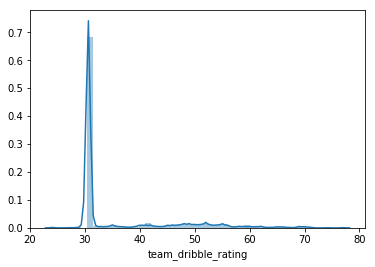

In [72]:
sns.distplot(soccer['team_dribble_rating'])

In [77]:
soccer.loc[(soccer['team_dribble_rating']!= mean_little_drib) &
           (soccer['team_dribble_scale']=='Little'),:]['team_dribble_rating'].value_counts()

32.0    268
33.0    202
29.0    106
31.0     74
24.0     72
30.0     60
27.0     38
28.0     34
Name: team_dribble_rating, dtype: int64

I'm ok with the imputation strategy for now.